In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

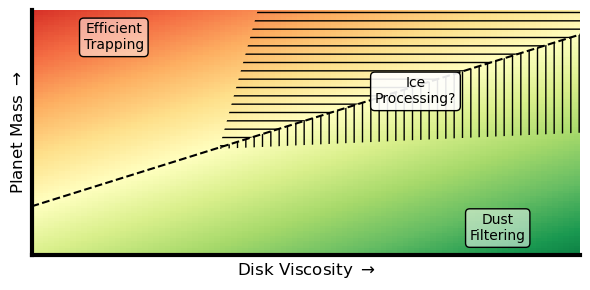

In [3]:
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["xtick.major.top"] = False
mpl.rcParams["xtick.major.bottom"] = False
mpl.rcParams["ytick.major.right"] = False
mpl.rcParams["ytick.major.left"] = False
mpl.rcParams["axes.linewidth"] = 3

fig,ax = plt.subplots(figsize=(6,3))

def centers(arr):
    return (arr[:-1]+arr[1:])/2

X = np.linspace(0,1,100)
Y = np.linspace(0,1,100)
xx, yy = np.meshgrid(centers(X),centers(Y))

filtering = lambda x: 0.7*x + 0.2
iceproc = lambda x: 0.1*x + 0.4
drive = lambda x: 8*x - 2.3

ax.pcolormesh(X, Y, yy-filtering(xx), cmap='RdYlGn_r', vmin=-1, vmax=1, rasterized=True)
ax.plot(X, filtering(X), c='k', ls='--')

x1 = X[iceproc(X)<filtering(X)]
y1 = iceproc(x1)
# ax.plot(x1,y1, c='k', ls=':')
ax.fill_between(x1, y1, filtering(x1), facecolor='none', hatch=r'||', lw=0)

x2 = X[drive(X)>filtering(X)]
y2 = drive(x1)
# ax.plot(x2, y2, c='k', ls=':')
ax.fill_between(x2, filtering(x2), y2, facecolor='none', hatch=r'--', lw=0)

ax.set(xlim=(0,1), ylim=(0,1))
ax.text(0.85, 0.05, "Dust\nFiltering", ha='center', va='bottom',
        bbox=dict(boxstyle="round",
            fc=(1, 1, 1, 0.5),
        )
    )
ax.text(0.15, 0.95, "Efficient\nTrapping", ha='center', va='top',
        bbox=dict(boxstyle="round",
            fc=(1, 1, 1, 0.5),
            )
        )

ax.text(0.7, 0.73, "Ice\nProcessing?", ha='center', va='top',
        bbox=dict(boxstyle="round",
            fc=(1, 1, 1, 0.9),
            )
        )

ax.set_xlabel("Disk Viscosity "+r"$\rightarrow$", size='large')

ax.set_ylabel("Planet Mass "+r"$\rightarrow$", size='large')

plt.tight_layout()

plt.savefig("filtering_schematic.pdf", bbox_inches='tight')

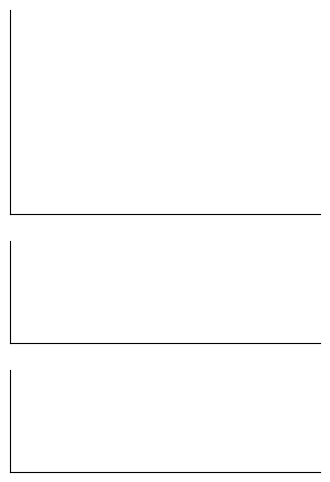

In [ ]:
mpl.rcParams["axes.spines.top"] = False
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.right"] = False
mpl.rcParams["axes.spines.left"] = True
mpl.rcParams["xtick.major.top"] = False
mpl.rcParams["xtick.major.bottom"] = False
mpl.rcParams["ytick.major.right"] = False
mpl.rcParams["ytick.major.left"] = False

fig,axs = plt.subplots(3, 1, gridspec_kw={'height_ratios':(2,1,1)}, figsize=(4, 6))

import sys
ptpath = "/Users/ericvc/cpartrace/"
if ptpath not in sys.path:
    sys.path.append(ptpath)
import pywrapper.partrace as pt
from pywrapper.model import Model as model

ax = axs[0]
model = Model("/Users/ericvc/")